<a href="https://colab.research.google.com/github/ivan-mihailov/LS-Unit-2-Sprint-1-Assignments/blob/main/Ivan_Mihailov_LS_DS_213_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 3*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Ridge Regression

For this project, you'll return to the Tribecca Condo dataset. But this time, you'll look at the _entire_ dataset and try to predict property sale prices.

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two subset your dataset to one-family dwellings whose price is between \\$100,000 and \\$2,000,000.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `OneHotEncoder`, and transform `X_train` and `X_test`.
- **Task 7:** Build and train a `LinearRegression` model.
- **Task 8:** Build and train a `Ridge` model.
- **Task 9:** Calculate the training and test mean absolute error for your `LinearRegression` model.
- **Task 10:** Calculate the training and test mean absolute error for your `Ridge` model.
- **Task 11:** Create a horizontal bar chart showing the 10 most influencial features for your `Ridge` model. 

**Note**

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [32]:
def wrangle(filepath):
    # Import csv file
    cols = ['BOROUGH', 'NEIGHBORHOOD',
            'BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET',  
            'YEAR BUILT', 'SALE PRICE', 'SALE DATE']
    df = pd.read_csv(filepath, usecols=cols)
    
    df['SALE DATE'] = pd.to_datetime(df['SALE DATE']) # Convert 'SALE DATE' column to datetime format

    df = df.set_index('SALE DATE') # Set 'SALE DATE' column as the dataframe index

    df['BOROUGH'] = df['BOROUGH'].apply(str) # Transform 'BOROUGH' column from integer to object

    df['SALE PRICE'] = df['SALE PRICE'].str.lstrip('$ -') # Remove leading symbols and spaces from 'SALE PRICE' column

    df['SALE PRICE'] = df['SALE PRICE'].str.replace(',', '') # Remove "," from 'SALE PRICE' column

    df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE']) # Transform 'SALE PRICE' column from string to integer

    df = df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS'] # Isolate only One Family Dwellings
    
    df =df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 2000000)] # Isolate only units sold for more than $100,000 & less than $2,000,000
  
    return df

filepath = DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv'

**Task 1:** Use the above `wrangle` function to import the `NYC_Citywide_Rolling_Calendar_Sales.csv` file into a DataFrame named `df`.

In [33]:
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score

In [34]:
df = wrangle(filepath)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
SALE DATE,,,,,,
2019-01-01,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1325.0,1930.0,550000
2019-01-01,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,2001.0,1940.0,200000
2019-01-02,2,PELHAM PARKWAY SOUTH,01 ONE FAMILY DWELLINGS,2043.0,1925.0,810000
2019-01-02,3,FLATBUSH-CENTRAL,01 ONE FAMILY DWELLINGS,2680.0,1899.0,125000
2019-01-02,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1872.0,1940.0,620000


**Task 2:** Modify the above `wrangle` function so that:

- The column `'SALE DATE'` becomes the `DatetimeIndex`.
- The dtype for the `'BOROUGH'` column is `object`, not `int`.
- The dtype for the `'SALE PRICE'` column is `int`, not `object`.
- The dataset includes only one-family dwellings (`BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS'`).
- The dataset includes only properties whose sale price is between \\$100,000 and \\$2,000,000.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3151 entries, 2019-01-01 to 2019-04-30
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BOROUGH                  3151 non-null   object 
 1   NEIGHBORHOOD             3151 non-null   object 
 2   BUILDING CLASS CATEGORY  3151 non-null   object 
 3   GROSS SQUARE FEET        3151 non-null   float64
 4   YEAR BUILT               3151 non-null   float64
 5   SALE PRICE               3151 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 172.3+ KB


In [ ]:
# Perform your exploratory data analysis here and
# modify the wrangle function above

print(df.shape)
df.describe()
df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS'].value_counts()

(23040, 7)


BOROUGH  NEIGHBORHOOD              BUILDING CLASS CATEGORY  GROSS SQUARE FEET  YEAR BUILT  SALE PRICE     SALE DATE 
2        MORRIS PARK/VAN NEST      01 ONE FAMILY DWELLINGS  1728.0             1935.0      $   - 0        01/01/2019    2
4        JAMAICA                   01 ONE FAMILY DWELLINGS  1184.0             1920.0      $   - 0        04/05/2019    2
3        SHEEPSHEAD BAY            01 ONE FAMILY DWELLINGS  1460.0             1910.0      $   1,100,000  03/29/2019    2
                                                            2600.0             1930.0      $   - 0        01/13/2019    2
         SPRING CREEK              01 ONE FAMILY DWELLINGS  1640.0             2017.0      $   545,000    04/16/2019    2
                                                                                                                       ..
4        SO. JAMAICA-BAISLEY PARK  01 ONE FAMILY DWELLINGS  1344.0             1930.0      $   470,000    04/11/2019    1
                             

In [ ]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [ ]:
df['SALE DATE']

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
           ...    
23035   2019-04-30
23036   2019-04-30
23037   2019-04-30
23038   2019-04-30
23039   2019-04-30
Name: SALE DATE, Length: 23040, dtype: datetime64[ns]

In [ ]:
df['BOROUGH'] = df['BOROUGH'].apply(str)

In [ ]:
df['BOROUGH'].dtypes

dtype('O')

In [ ]:
df['SALE PRICE'] = df['SALE PRICE'].str.lstrip('$ -')

In [ ]:
df['SALE PRICE'] = df['SALE PRICE'].str.replace(',', '')

In [ ]:
df['SALE PRICE']

0              0
1              0
2              0
3              0
4              0
          ...   
23035     510000
23036     355000
23037     375000
23038    1100000
23039     569202
Name: SALE PRICE, Length: 23040, dtype: object

In [ ]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'])

In [ ]:
df['SALE PRICE'].dtypes

dtype('int64')

In [36]:
df = wrangle(filepath)

In [37]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
SALE DATE,,,,,,
2019-01-01,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1325.0,1930.0,550000
2019-01-01,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,2001.0,1940.0,200000
2019-01-02,2,PELHAM PARKWAY SOUTH,01 ONE FAMILY DWELLINGS,2043.0,1925.0,810000
2019-01-02,3,FLATBUSH-CENTRAL,01 ONE FAMILY DWELLINGS,2680.0,1899.0,125000
2019-01-02,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1872.0,1940.0,620000


In [38]:
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].astype(int)

In [39]:
df['YEAR BUILT'] = df['YEAR BUILT'].astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3151 entries, 2019-01-01 to 2019-04-30
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   BOROUGH                  3151 non-null   object
 1   NEIGHBORHOOD             3151 non-null   object
 2   BUILDING CLASS CATEGORY  3151 non-null   object
 3   GROSS SQUARE FEET        3151 non-null   int64 
 4   YEAR BUILT               3151 non-null   int64 
 5   SALE PRICE               3151 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 172.3+ KB


# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'SALE_PRICE'`.

In [41]:
df.describe(exclude = 'number')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY
count,3151,3151,3151
unique,5,183,1
top,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS
freq,1580,97,3151


In [42]:
df.describe()

,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,3151.000000,3151.000000,3.151000e+03
mean,1470.306887,1943.694700,6.285601e+05
std,586.339200,26.676786,2.929904e+05
min,0.000000,1890.000000,1.040000e+05
25%,1144.000000,1925.000000,4.475000e+05
50%,1360.000000,1938.000000,5.680000e+05
75%,1683.000000,1955.000000,7.600000e+05
max,7875.000000,2018.000000,1.955000e+06


In [43]:
features = ['BOROUGH', 'GROSS SQUARE FEET', 'YEAR BUILT']

X = df[features]
y = df['SALE PRICE']

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from January to March 2019. 
- Your test set should include data from April 2019.

In [44]:
cutoff = pd.to_datetime('2019-04-01') # Create a cutoff date for the train/test split
train = df[df.index < cutoff]
test = df[df.index > cutoff]

X_train, y_train = train[features], train['SALE PRICE']
X_test, y_test = test[features], test['SALE PRICE']

In [46]:
train.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
SALE DATE,,,,,,
2019-01-01,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1325,1930,550000
2019-01-01,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,2001,1940,200000
2019-01-02,2,PELHAM PARKWAY SOUTH,01 ONE FAMILY DWELLINGS,2043,1925,810000
2019-01-02,3,FLATBUSH-CENTRAL,01 ONE FAMILY DWELLINGS,2680,1899,125000
2019-01-02,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1872,1940,620000


In [47]:
test.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
SALE DATE,,,,,,
2019-04-02,2,MOTT HAVEN/PORT MORRIS,01 ONE FAMILY DWELLINGS,1104,2000,375000
2019-04-02,3,BENSONHURST,01 ONE FAMILY DWELLINGS,3690,1920,1600000
2019-04-02,3,BENSONHURST,01 ONE FAMILY DWELLINGS,1296,1930,900000
2019-04-02,3,BERGEN BEACH,01 ONE FAMILY DWELLINGS,1665,1970,780000
2019-04-02,3,CONEY ISLAND,01 ONE FAMILY DWELLINGS,1344,1993,580000


# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model.

In [48]:
guess_train = y_train.mean()
y_pred_train = [guess_train] * len(y_train)
baseline_mae_train = mean_absolute_error(y_train, y_pred_train)
print('Baseline MAE for training set is:', baseline_mae_train)

Baseline MAE for training set is: 214721.52773001452


In [49]:
guess_test = y_test.mean()
y_pred_test = [guess_test] * len(y_test)
baseline_mae_test = mean_absolute_error(y_test, y_pred_test)
print('Baseline MAE for test set is:', baseline_mae_test)

Baseline MAE for test set is: 214452.69037895105


# IV. Build Model 

**Task 6:** Build and train a `OneHotEncoder` and then use it to transform `X_train` and `X_test`.

In [19]:
ohe = ce.OneHotEncoder(use_cat_names = True) # Use OneHotEncoder to transform 'Borough' column into 5 separate columns

XT_train = ohe.fit_transform(X_train)
XT_test = ohe.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [50]:
XT_train.head()

,BOROUGH_3,BOROUGH_4,BOROUGH_2,BOROUGH_5,BOROUGH_1,GROSS SQUARE FEET,YEAR BUILT
SALE DATE,,,,,,,
2019-01-01,1,0,0,0,0,1325,1930
2019-01-01,0,1,0,0,0,2001,1940
2019-01-02,0,0,1,0,0,2043,1925
2019-01-02,1,0,0,0,0,2680,1899
2019-01-02,1,0,0,0,0,1872,1940


In [51]:
XT_test.head()

,BOROUGH_3,BOROUGH_4,BOROUGH_2,BOROUGH_5,BOROUGH_1,GROSS SQUARE FEET,YEAR BUILT
SALE DATE,,,,,,,
2019-04-02,0,0,1,0,0,1104,2000
2019-04-02,1,0,0,0,0,3690,1920
2019-04-02,1,0,0,0,0,1296,1930
2019-04-02,1,0,0,0,0,1665,1970
2019-04-02,1,0,0,0,0,1344,1993


**Task 7:** Build and train a `LinearRegression` model named `model_lr`. Remember to train your model using your _transformed_ feature matrix.

In [22]:
model_lr = LinearRegression()

model_lr.fit(XT_train, y_train) # Fit the linear regression model to the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Task 8:** Build and train a `Ridge` model named `model_r`. Remember to train your model using your _transformed_ feature matrix.

In [25]:
model_r = Ridge(alpha = 0.1, normalize = True) # Set up the Ridge Regression model with an alpha of 0.1

model_r.fit(XT_train, y_train) # Fit the Ridge Regression model to the training data

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

# V. Check Metrics

**Task 9:** Check the training and test metrics for `model_lr`.

In [24]:
y_pred_train_lr = model_lr.predict(XT_train) # Calculate the y_pred value for the linear regression training set
y_pred_test_lr = model_lr.predict(XT_test) # Calculate the y_pred value for the linear regression test set

training_mae_lr = mean_absolute_error(y_train, y_pred_train_lr)
test_mae_lr = mean_absolute_error(y_test, y_pred_test_lr)

print('Linear Training MAE:', training_mae_lr)
print('Linear Test MAE:', test_mae_lr)

Linear Training MAE: 178539.24264685865
Linear Test MAE: 185217.19638112068


**Task 10:** Check the training and test metrics for `model_r`.

In [26]:
y_pred_train_r = model_r.predict(XT_train) # Calculate the y_pred value for the ridge regression training set
y_pred_test_r = model_r.predict(XT_test) # Calculate the y_pred value for the ridge regression test set

training_mae_r = mean_absolute_error(y_train, y_pred_train_r)
test_mae_r = mean_absolute_error(y_test, y_pred_test_r)

print('Ridge Training MAE:', training_mae_r)
print('Ridge Test MAE:', test_mae_r)

Ridge Training MAE: 178569.75607960712
Ridge Test MAE: 184936.78786130046


**Stretch Goal:** Calculate the training and test $R^2$ scores `model_r`.

In [27]:
# Caculate R^2 score

training_r2 = r2_score(y_train, y_pred_train_r)
test_r2 = r2_score(y_test, y_pred_test_r)

print('The Ridge Regression R^2 Score for the training set is:', training_r2)
print('The Ridge Regression R^2 Score for the test set is:', test_r2)

The Ridge Regression R^2 Score for the training set is: 0.3034067439199818
The Ridge Regression R^2 Score for the test set is: 0.24438618312635274


# IV. Communicate Results

**Task 11:** Create a horizontal barchart that plots the 10 most important coefficients for `model_r`, sorted by absolute value. Your figure should look like our example from class:

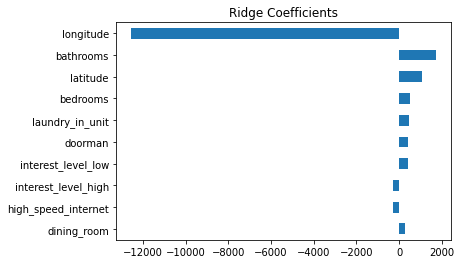

**Note:** Your figure shouldn't be identical to the one above. Your model will have different coefficients since it's been trained on different data. Only the formatting should be the same.

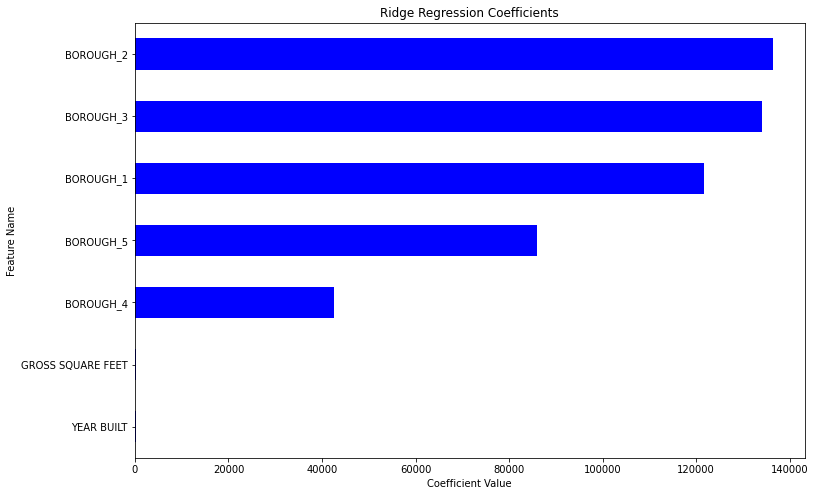

In [58]:
coefficients = pd.Series(model_r.coef_, XT_train.columns) # Create a pandas series using the ridge regression coefficients and the column names used in the model
plt.figure(figsize = [12, 8])

coefficients.abs().sort_values().plot.barh(color = 'blue') # Set up horizontal bar chart of the Ridge Regression Coefficients
plt.xlabel('Coefficient Value') # Set up name for y-axis
plt.ylabel('Feature Name') # Set up name for y-axis
plt.title('Ridge Regression Coefficients') # Set up table name
plt.show()

In [29]:
model_r.coef_

array([ 134163.75347532,   42621.94397422, -136349.4390413 ,
        -86007.09328405,  121693.85403566,     203.93526877,
           182.43163638])

In [67]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func = f_regression, k=5) # Use the f-regression function to select the 5 best features

XT_train_selected = selector.fit_transform(XT_train, y_train) # Use the fit_transform method to fit to the training data and then to transform it using only the 5 best features
XT_test_selected = selector.transform(XT_test) # Use the tranform method to apply the 5 best features to the test data

In [68]:
XT_train_selected.shape, XT_test_selected.shape

((2507, 5), (603, 5))

In [72]:
selected_mask = selector.get_support() 

all_names = XT_train.columns 
selected_names = all_names[selected_mask] # Identify the 5 best features selected by the SelectKBest function
not_selected_names  = all_names[~selected_mask] # Identify the features not selected by the SelectKBest function

print('Features Selected by Model:')
for name in selected_names:
  print('\n', name, '\n')

print('Features Not Selected by Model:')
for name in not_selected_names:
  print('\n', name, '\n')

Features Selected by Model:

 BOROUGH_3 


 BOROUGH_4 


 BOROUGH_2 


 BOROUGH_5 


 GROSS SQUARE FEET 

Features Not Selected by Model:

 BOROUGH_1 


 YEAR BUILT 

